In [12]:
%matplotlib inline

In [1]:
cd ../../cells/

/Users/yzerlaut/work/neural_network_dynamics/cells


In [ ]:
%run cell_construct.py -n LIF -c 'r' --save '../projects/biophys_awareness/data/inh_cell.svg' --amp 250
plt.show()


This file construct the equations for brian2

/!\ cell parameters --NOT-- in SI units /!\ 


In [ ]:
%run cell_construct.py -n AdExp -c 'g' --save '../projects/biophys_awareness/data/exc_cell.svg' --amp 250
plt.show()

In [ ]:
%run cell_construct.py -n LIF_Vreset_-60 -c 'k' --save '../projects/biophys_awareness/data/VA_cell.svg' --amp 250
plt.show()

In [41]:
cd ../projects/biophys_awareness/

/home/safaai/yann/neural_network_dynamics/projects/biophys_awareness


In [1]:
%run contrib_of_single_spike.py -f data/active.npz# default config (RS-FS)

In [2]:
%run contrib_of_single_spike.py -f data/VA.npz --NRNe LIF_Vreset_-60 --NRNi LIF_Vreset_-60 --NTWK Vogels-Abbott --fext_stat 0. --tstop 50000. --nsim 4

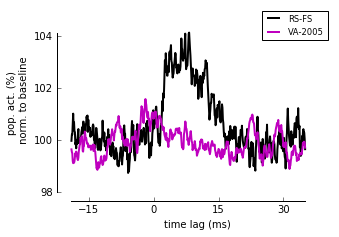

In [34]:
VAdata = np.load('data/VA.npz')
RFdata = np.load('data/active.npz')

args = VAdata['args'].all()

fig, AX = plt.subplots(1, figsize=(5,3.5))
plt.subplots_adjust(left=0.15, bottom=0.15)
# normalize to mean level
t_zoom = np.linspace(-19, 35, int(54/args.DT)+1)
traceVA, counterVA = 0.*t_zoom, 0
for spike_times, exc_act in zip(VAdata['SPK_TIMES'], VAdata['EXC_ACTS']):
    i_plot = int(VAdata['SPK_TIMES'].shape[0]*len(np.unique(spike_times))/20)
    for t_spk in np.unique(spike_times):
        i_spk = int(t_spk/args.DT)
        counterVA += 1
        traceVA += exc_act[i_spk+int(t_zoom[0]/args.DT):i_spk+int(t_zoom[-1]/args.DT)+1]
VA_resp = traceVA/counterVA

traceRF, counterRF = 0.*t_zoom, 0
for spike_times, exc_act in zip(RFdata['SPK_TIMES'], RFdata['EXC_ACTS']):
    i_plot = int(RFdata['SPK_TIMES'].shape[0]*len(np.unique(spike_times))/20)
    for t_spk in np.unique(spike_times):
        i_spk = int(t_spk/args.DT)
        counterRF +=1
        traceRF += exc_act[i_spk+int(t_zoom[0]/args.DT):i_spk+int(t_zoom[-1]/args.DT)+1]
RSFS_resp = traceRF/counterRF

AX.plot(t_zoom, 100.*RSFS_resp/RSFS_resp[t_zoom<0].mean(), 'k-', lw=2, label='RS-FS')
AX.plot(t_zoom, 100.*VA_resp/VA_resp[t_zoom<0].mean(), 'm-', lw=2, label='VA-2005')
AX.legend(prop={'size':'small'})
import sys
sys.path.append('/Users/yzerlaut/work/common_libraries/')
from graphs.my_graph import set_plot
set_plot(AX, xlabel='time lag (ms)', ylabel='pop. act. (%) \n norm. to baseline')
fig.savefig('/Users/yzerlaut/Desktop/fig2.svg')